**Importing required libraries**

In [ ]:
# Import necessary libraries and modules
from skimage import io
import os
from sklearn.cluster import KMeans #Kmeans Algo.
import numpy as np # linear algebra
import matplotlib.pyplot as plt # Data Visualization 

**Loading Image**

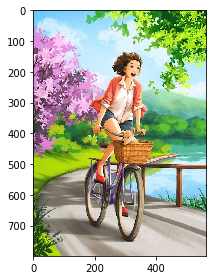

In [ ]:
# Input image
img = io.imread('3.png')
io.imshow(img)
io.show()

**The image shape contains the rows, columns and channels in the image.**

Here we can see that it contains 3 channels because it is a colored picture

In [ ]:
img.shape

(799, 564, 3)

In [ ]:
# Extract rows and columns
rows = img.shape[0]
cols = img.shape[1]

**We will reshape this image so that it contains only 2 parameters: product of rows and columns**

i.e. no. of pixels and no. of channels.

In [ ]:
# Reshape to make it 2D
image = img.reshape(img.shape[0]*img.shape[1],3)

**Now we will quantize colors to 6 only**

In [ ]:
# Run the Kmeans algorithm
# n_init : number of times to run the k-means algorithm before determining the best centroids
# max_iter : number of iterations before k-means comes to an end for a single run
kmeans = KMeans(n_clusters = 8, n_init=10, max_iter=200)
kmeans.fit(image)

KMeans(max_iter=200)

In [ ]:
kmeans.cluster_centers_

array([[195.20631049, 232.1865133 , 249.59632181],
       [215.71344437, 123.06363302,  73.73792215],
       [150.42265911, 165.91673214, 151.04229153],
       [ 77.46677987, 151.4066222 ,  53.39199515],
       [ 51.84390066,  71.69268322,  35.88723008],
       [168.70645054, 216.68315051,  39.18241837],
       [220.30865967, 195.25788271, 199.78322809],
       [118.3437922 ,  99.92261957,  99.2619745 ]])

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


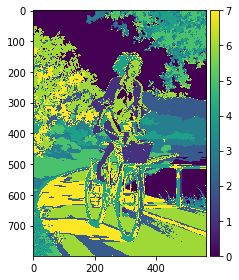

In [ ]:
# Use the centroids to compress the image
clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8)  # Codebook for de-compression
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(rows,cols); 
io.imshow(labels)

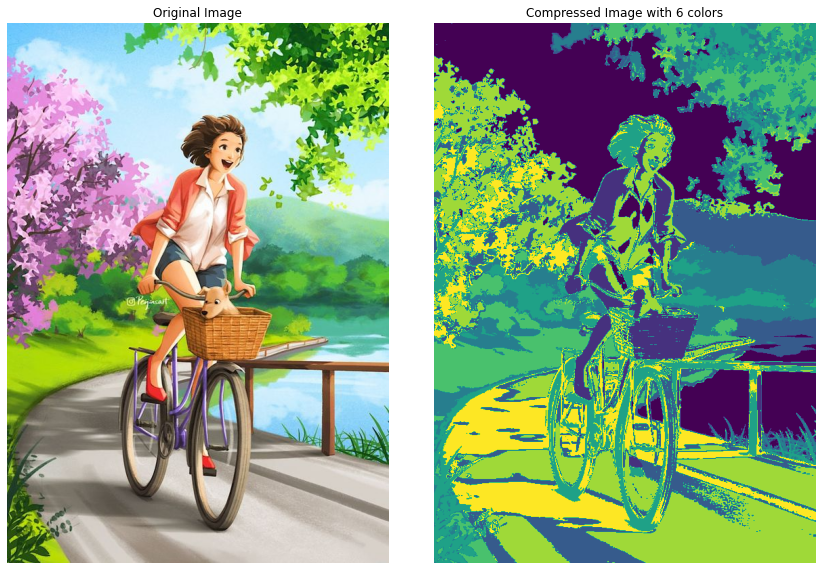

In [ ]:
# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))

ax[0].imshow(img)
ax[0].set_title('Original Image')

ax[1].imshow(labels)
ax[1].set_title('Compressed Image with 6 colors')

for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

In [ ]:
np.save('compressedk=8.npy',clusters)    
io.imsave('compressedk=8.png',labels);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: compressedk=8.png is a low contrast image
  


In [ ]:
import os
compression_ratio = os.path.getsize('3.png')/os.path.getsize('compressedk=8.png')
print(compression_ratio)

14.118362917603287


In [ ]:
os.path.getsize('3.png')

728564

In [ ]:
os.path.getsize('compressedk=8.png')

51604

In [ ]:
Error = os.path.getsize('3.png') - os.path.getsize('compressedk=8.png')
print(Error)

676960


In [ ]:
img.size


1351908

In [ ]:
labels.size

450636

In [ ]:
Error2=img.size-labels.size
print(Error2)

901272
